# Example wind resource forecast

Here's a quick example of a wind resource forecast using NOAA GFS and ECMWF AIFS.

First, import some things:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from forecast_wind import get_wind_forecast

Define the location and forecast time information. We will use the Vineyard Wind project as Hurricane Erin approached, inspired by this post by Grid Status: https://www.linkedin.com/posts/grid-status_hurricane-erin-the-1st-major-storm-of-the-activity-7366092037596561409-HWyS/.

In [2]:
latitude, longitude = 41.03325, -70.61667 # vineyard wind
init_date = '2025-08-20 12:00' # datetime the forecast model was initialized
run_length = 36
lead_time_to_start = 12

## NOAA GFS
Now, get the GFS forecast:

In [3]:
resource_data_gfs = get_wind_forecast(
    latitude,
    longitude,
    init_date,
    run_length=run_length, 
    lead_time_to_start=lead_time_to_start, 
    model='gfs',
)

✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2025-Aug-20 12:00 UTC F12 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [5] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2025-Aug-20 12:00 UTC F13 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [5] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2025-Aug-20 12:00 UTC F14 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [5] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2025-Aug-20 12:00 UTC F15 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [5] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2025-Aug-20 12:00 UTC F16 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [5] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2025-Aug-20 

Preview the output:

In [4]:
resource_data_gfs.head()

,point,wind_speed_10m,wind_speed_80m,wind_speed_100m,wind_direction_10m,wind_direction_80m,wind_direction_100m,temp_air_2m,pressure_0m
valid_time,,,,,,,,,
2025-08-21 00:00:00,0,11.140470,12.799704,12.882806,90.466507,90.871513,90.899513,18.677315,101876.140625
2025-08-21 01:00:00,0,11.049027,12.681253,12.767630,90.182022,90.634171,90.664017,18.600904,101887.039062
2025-08-21 02:00:00,0,11.002935,12.622985,12.703694,86.678719,87.271492,87.333443,18.443037,101863.601562
2025-08-21 03:00:00,0,11.332997,13.067352,13.154832,85.720413,86.170784,86.249306,18.386858,101827.625000
2025-08-21 04:00:00,0,11.553192,13.415955,13.518823,85.704918,86.074982,86.156898,18.381371,101775.539062


And a quick plot:

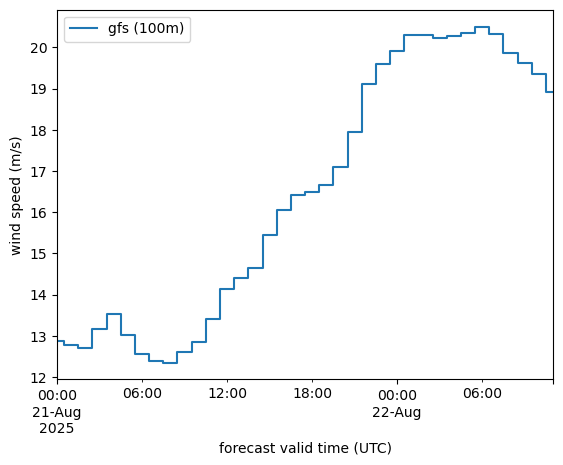

In [5]:
resource_data_gfs['wind_speed_100m'].plot(drawstyle='steps-mid', label='gfs (100m)')
plt.ylabel('wind speed (m/s)')
plt.xlabel('forecast valid time (UTC)')
plt.legend()
plt.show()

## ECMWF AIFS
And then get the ECMWF AIFS forecast:

In [6]:
resource_data_aifs = get_wind_forecast(
    latitude,
    longitude,
    init_date,
    run_length=run_length, 
    lead_time_to_start=lead_time_to_start, 
    model='aifs',
)

✅ Found ┊ model=aifs ┊ product=oper ┊ 2025-Aug-20 12:00 UTC F12 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [4] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=aifs ┊ product=oper ┊ 2025-Aug-20 12:00 UTC F18 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [4] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=aifs ┊ product=oper ┊ 2025-Aug-20 12:00 UTC F24 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [4] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=aifs ┊ product=oper ┊ 2025-Aug-20 12:00 UTC F30 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [4] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=aifs ┊ product=oper ┊ 2025-Aug-20 12:00 UTC F36 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [4] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=aifs ┊ product=oper ┊ 2025-Aug-20 12:00 UTC F42 ┊ GRIB2 @ aws ┊ 

Preview the output:

In [7]:
resource_data_aifs.head()

,point,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,temp_air_2m,pressure_0m
valid_time,,,,,,,
2025-08-21 00:00:00,0,11.196704,13.373463,74.488678,75.916504,18.436293,101805.148438
2025-08-21 01:00:00,0,11.322634,13.471054,74.257965,75.598068,18.346632,101788.609375
2025-08-21 02:00:00,0,11.448565,13.568645,74.027252,75.279648,18.256971,101772.054688
2025-08-21 03:00:00,0,11.574494,13.666234,73.796539,74.961220,18.167311,101755.515625
2025-08-21 04:00:00,0,11.700425,13.763825,73.565826,74.642799,18.077650,101738.976562


And plot both forecasts:

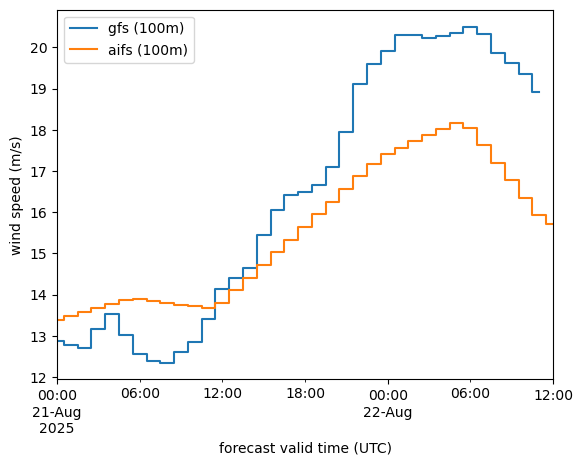

In [8]:
resource_data_gfs['wind_speed_100m'].plot(drawstyle='steps-mid', label='gfs (100m)')
resource_data_aifs['wind_speed_100m'].plot(drawstyle='steps-mid', label='aifs (100m)')
plt.ylabel('wind speed (m/s)')
plt.xlabel('forecast valid time (UTC)')
plt.legend()
plt.show()

Note that the AIFS forecast is 6-hour interval, but `get_wind_forecast` interpolates it to hourly. 

## Convert the dataframe format

We can convert the dataframe format returned by `get_wind_forecast` to something closer to what is used for wind resource data in `windpowerlib` [1], a python-based wind power modeling library. An example of that format is in [2].

[1] https://github.com/wind-python/windpowerlib/
[2] https://windpowerlib.readthedocs.io/en/stable/modelchain_example_notebook.html#Import-weather-data

In [9]:
# select a single point - we only had one in the example above
i = 0 

# make a new dataframe, copying relevant columns
weather = resource_data_gfs[resource_data_gfs['point']==i][
    [
        'wind_speed_10m',
        'wind_speed_80m',
        'wind_speed_100m',
        'temp_air_2m',
        'pressure_0m',
    ]
    ].copy()

# convert temperature from Celsius to Kelvin
weather['temp_air_2m'] = weather['temp_air_2m'] + 273.15

# turn into a multiindex
weather.columns = pd.MultiIndex.from_tuples((
    ('wind_speed', 10),
    ('wind_speed', 80),
    ('wind_speed', 100),
    ('temperature', 2),
    ('pressure', 0)
    ),
    names = ['variable_name', 'height'])

# preview
weather.head()

variable_name       wind_speed                       temperature  \
height                     10         80         100         2     
valid_time                                                         
2025-08-21 00:00:00  11.140470  12.799704  12.882806  291.827301   
2025-08-21 01:00:00  11.049027  12.681253  12.767630  291.750885   
2025-08-21 02:00:00  11.002935  12.622985  12.703694  291.593018   
2025-08-21 03:00:00  11.332997  13.067352  13.154832  291.536865   
2025-08-21 04:00:00  11.553192  13.415955  13.518823  291.531372   

variable_name             pressure  
height                         0    
valid_time                          
2025-08-21 00:00:00  101876.140625  
2025-08-21 01:00:00  101887.039062  
2025-08-21 02:00:00  101863.601562  
2025-08-21 03:00:00  101827.625000  
2025-08-21 04:00:00  101775.539062